# `special`

In this module, general functions are presented which do not fall under a same category.

In [1]:
import dsptoolbox as dsp
from os.path import join

### Waterfall plot

(<Figure size 1000x800 with 1 Axes>,
 <Axes3DSubplot: xlabel='Time / s', ylabel='Frequency / Hz', zlabel='dBFS (normalized @ peak)'>)

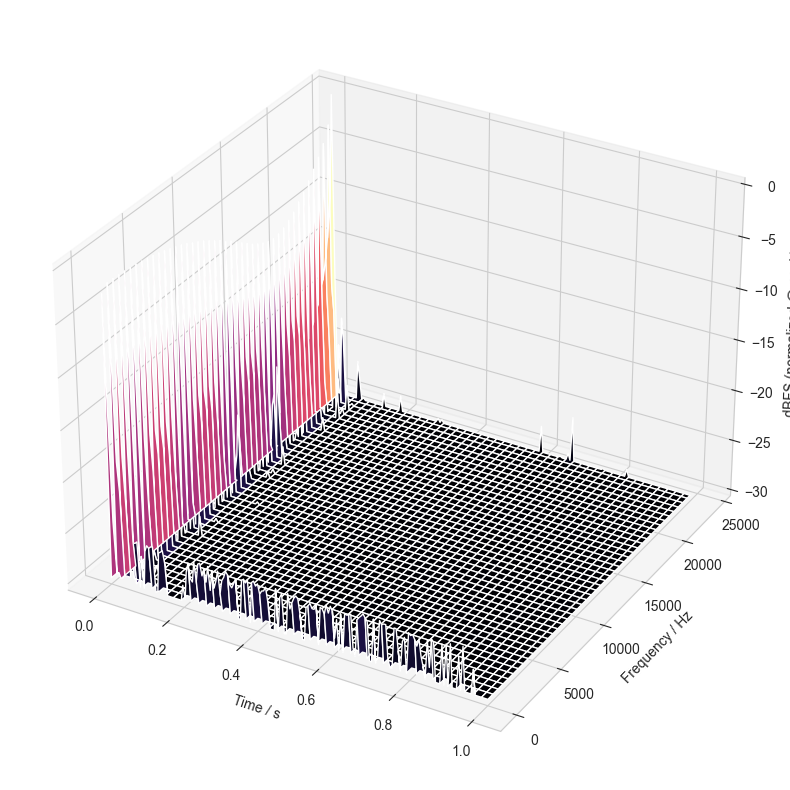

In [2]:
rir = dsp.Signal(join('data', 'rir.wav'), signal_type='rir')
rir.set_spectrogram_parameters(window_length_samples=256, overlap_percent=0,
                               window_type='boxcar')
dsp.special.plot_waterfall(rir, dynamic_range_db=30)

### Cepstrum

(0.0, 0.05)

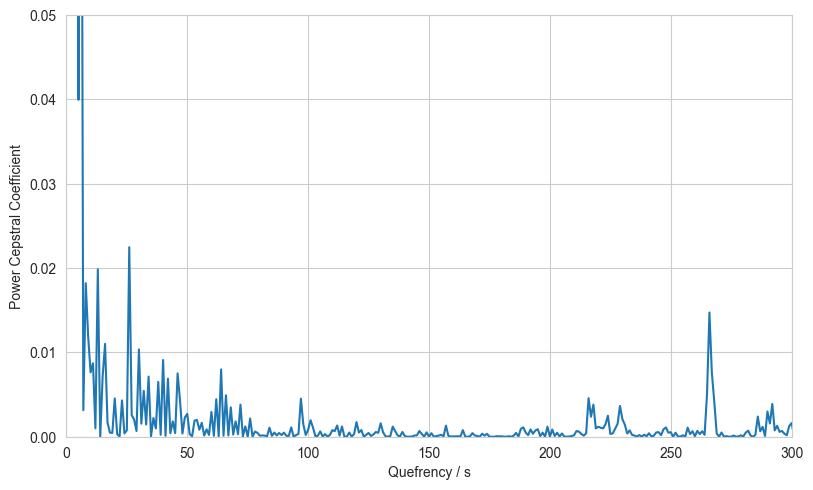

In [3]:
speech = dsp.Signal(join('data', 'speech.flac'))
cp = dsp.special.cepstrum(speech, mode='power')
fig, ax = dsp.plots.general_plot(
    range(len(cp)), cp, xlabel='Quefrency / s',
    ylabel='Power Cepstral Coefficient', log=False, returns=True)
ax.set_xlim([0, 300])
ax.set_ylim([0, 5e-2])

### MFCC
The mel-frequency cepstral coefficients is an audio feature used in speech recognition systems and certain Machine Learning applications.

/Users/neumanndev/opt/anaconda3/envs/dsp-dev11/lib/python3.11/site-packages/dsptoolbox/special/special.py:313: RuntimeWarning: divide by zero encountered in log
  log_sp = 2*np.log(np.abs(sp))


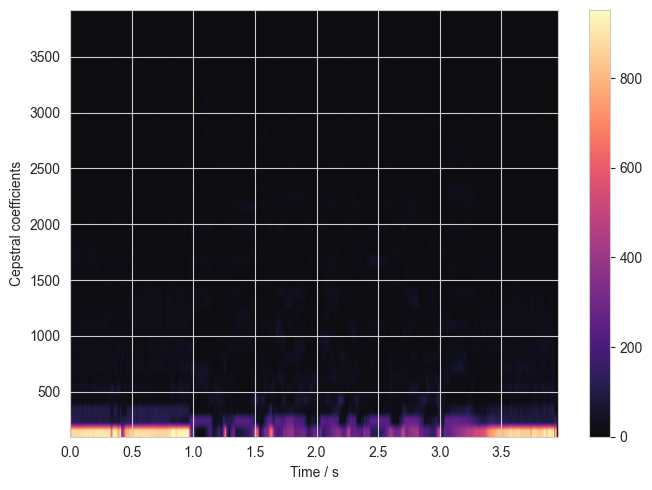

In [4]:
dsp.special.mfcc(speech);

### Log-mel Spectrogram
This function turns the axis of a spectrogram from Hz to Mel bands

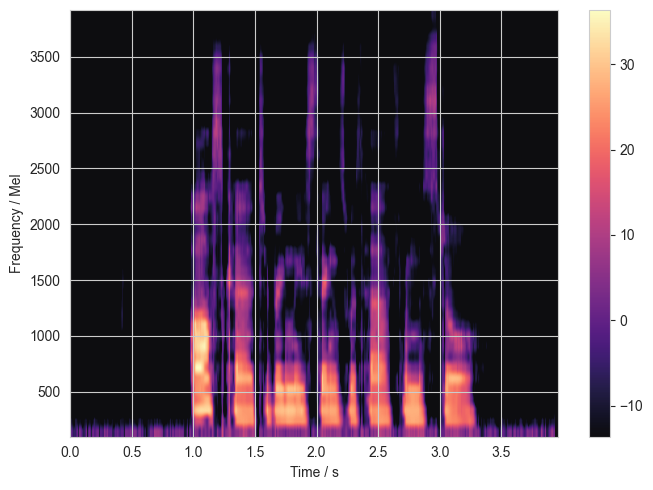

In [5]:
dsp.special.log_mel_spectrogram(speech);

### Inverse STFT
The STFT matrix of a multi-channel signal can be turned back into the signal by using the inverse transform. The differences between the signals are due to numerical errors and depend on the type of window and overlap used.

Remark: when setting `detrend=True` or `padding=False` while acquiring the STFT, some small signal distortions might arise.

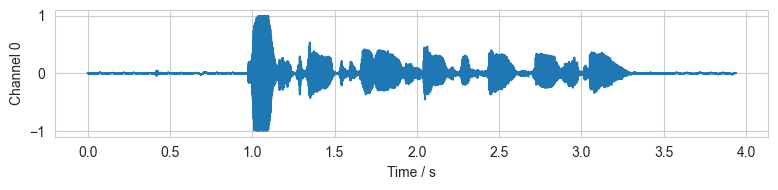

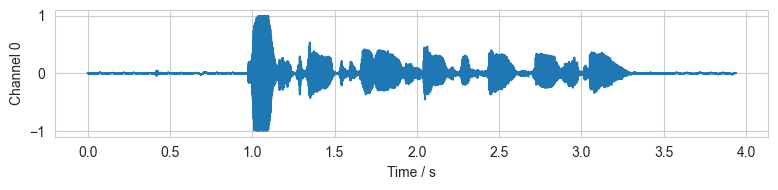

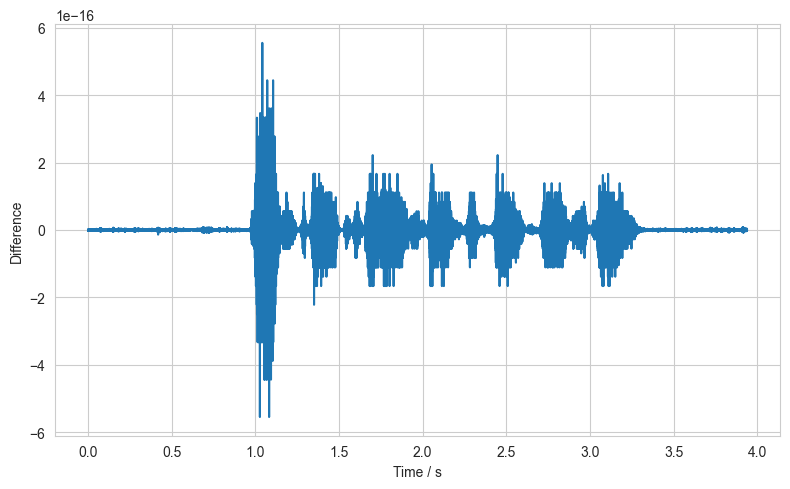

In [9]:
t, f, sp = speech.get_spectrogram()
speech_rec = dsp.special.istft(sp, original_signal=speech)

speech.plot_time()
speech_rec.plot_time()

dsp.plots.general_plot(
    speech.time_vector_s, speech.time_data - speech_rec.time_data, log=False,
    xlabel='Time / s', ylabel='Difference')